In [359]:
# libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pit
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost

In [360]:
data=pd.read_csv("/content/weatherAUS.csv")

In [361]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

In [362]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm        RISK_MM  
count  88536.000000  85099.000000  141289.000000  139467.000000  142193.000000  
mean       4.437189      4.503167      16.987509      21.687235       2.360682  
std        2.887016      2.720633       6.492838       6.937594       8.477969  
min        0.000000      0.000000      -7.200000      -5.400000       0.000000  
25%        1.000000      2.000000      12.300000      16.600000       0.000000  
50%        5.000000      5.000000      16.700000      21.100000       0.000000  
75%        7.000000      7.000000      21.600000      26.400000       0.800000  
max        9.000000      9.000000      40.200000      46.700000     371.000000

In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [364]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

<Axes: >

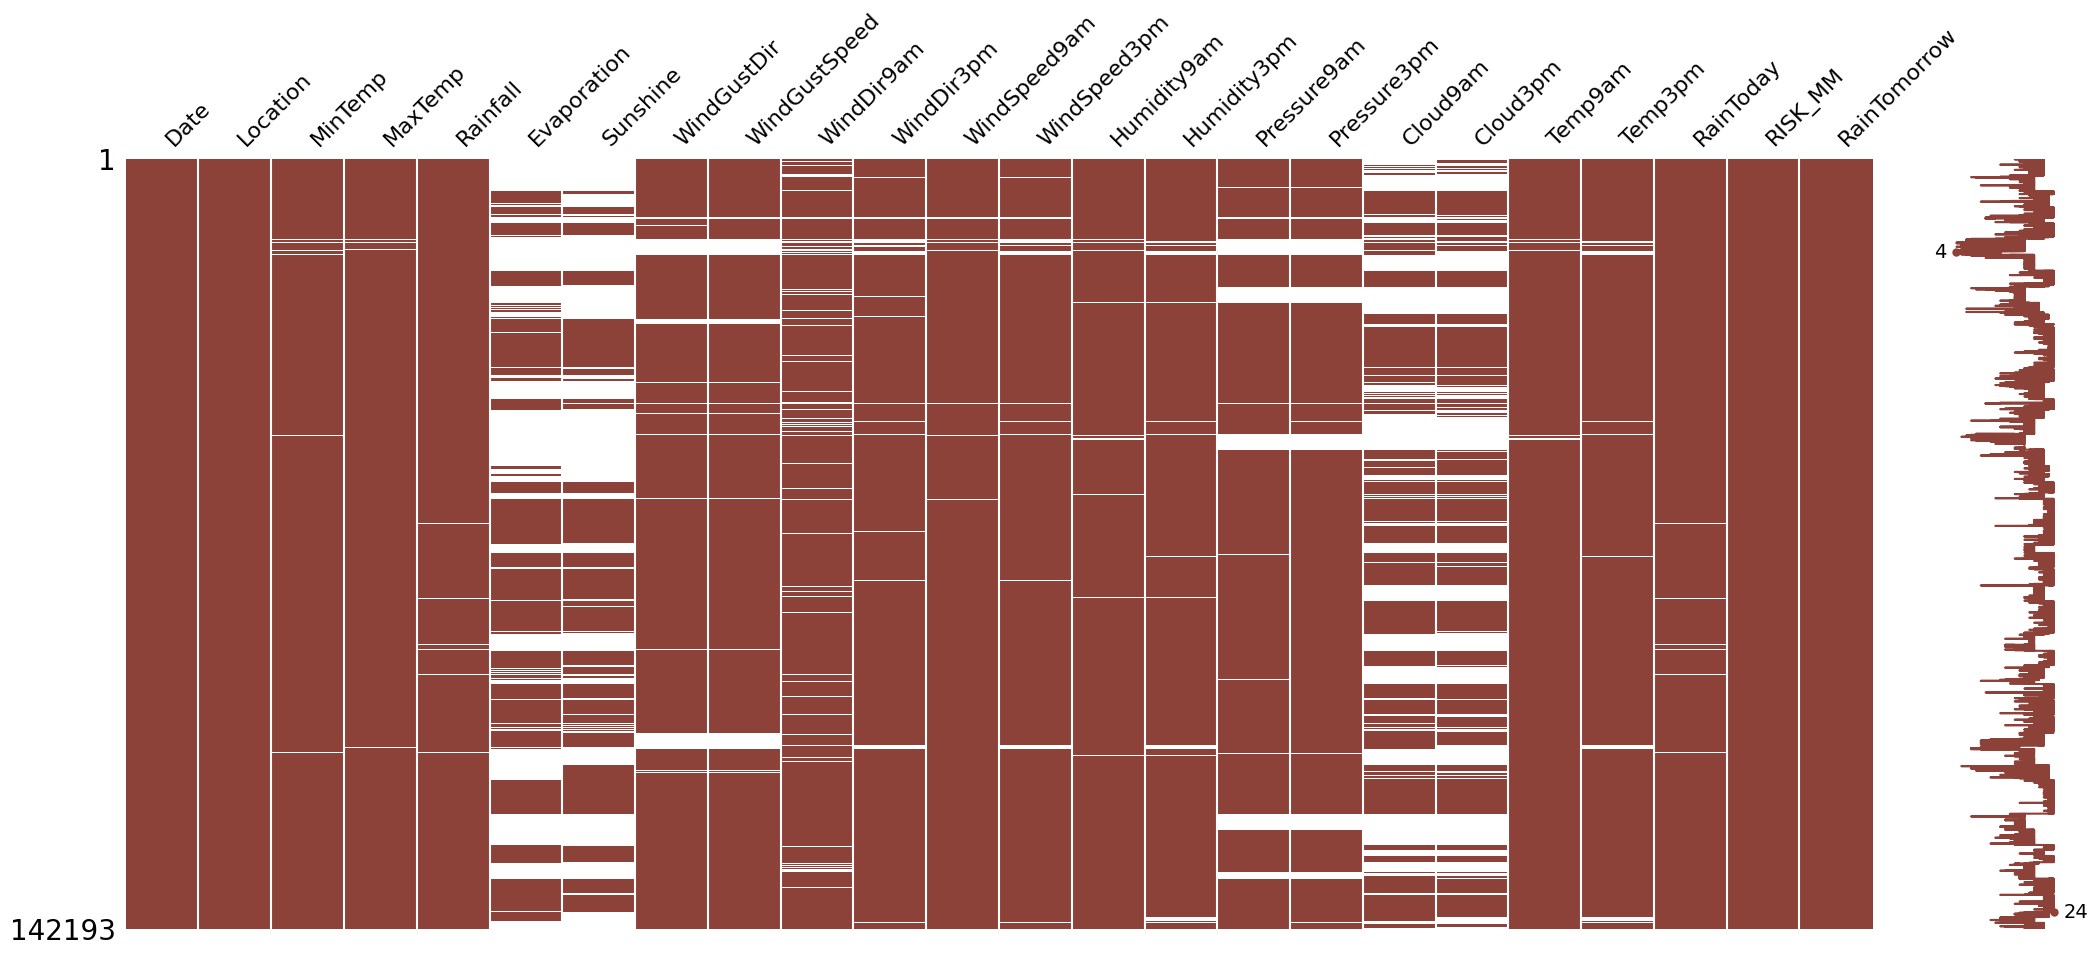

In [365]:
import missingno as msno
msno.matrix(data,color=(0.55, 0.255, 0.225), fontsize=16)

In [366]:
# removing columns with more than missing values and segregatting cat and num variables
data_cat = data[['RainToday','WindGustDir','WindDir9am','WindDir3pm']]
data.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)
data.drop(columns =['RainToday','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [367]:
# filling the missing data of numeric variables with mean
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)

In [368]:
import pandas as pd

# Assuming 'x' is a DataFrame and 'date_column' is the name of the column containing the date strings
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

# Now you can drop the original date column if you don't need it anymore
data = data.drop('Date', axis=1)


In [369]:
#Loading the names of categorical columns
cat_names = data_cat.columns

In [370]:
# intializing the simple imputer for missing categorical values
import numpy as np
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [371]:
#fitting and transforming the missing data
data_cat = imp_mode.fit_transform(data_cat)

In [372]:
#converting array to dataframe
data_cat = pd.DataFrame(data_cat,columns=cat_names)

In [373]:
# concatinattng the categorical and nuneric data
data = pd.concat([data,data_cat],axis=1)

In [374]:
data.corr()

<ipython-input-374-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.731562  0.103314       0.173331      0.174946   
MaxTemp        0.731562  1.000000 -0.074234       0.066263      0.015506   
Rainfall       0.103314 -0.074234  1.000000       0.127250      0.085977   
WindGustSpeed  0.173331  0.066263  0.127250       1.000000      0.577864   
WindSpeed9am   0.174946  0.015506  0.085977       0.577864      1.000000   
WindSpeed3pm   0.174187  0.050940  0.056762       0.658377      0.513079   
Humidity9am   -0.232372 -0.499027  0.221392      -0.209272     -0.269027   
Humidity3pm    0.005913 -0.498524  0.249609      -0.025822     -0.030991   
Pressure9am   -0.424357 -0.308204 -0.159676      -0.426600     -0.215178   
Pressure3pm   -0.434034 -0.396261 -0.120366      -0.384642     -0.165050   
Temp9am        0.897999  0.877435  0.011384       0.146756      0.128769   
Temp3pm        0.699828  0.966913 -0.077553       0.032274      0.005026   
RISK_MM        0.123928 -0.044098  0.301844       0.156620      0.068828   
year           0.039126  0.058058 -0.009242      -0.031422     -0.021498   
month         -0.203826 -0.163920 -0.030710       0.058868      0.050776   
day            0.001504 -0.000025  0.001129      -0.008919     -0.009140   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp            0.174187    -0.232372     0.005913    -0.424357   
MaxTemp            0.050940    -0.499027    -0.498524    -0.308204   
Rainfall           0.056762     0.221392     0.249609    -0.159676   
WindGustSpeed      0.658377    -0.209272    -0.025822    -0.426600   
WindSpeed9am       0.513079    -0.269027    -0.030991    -0.215178   
WindSpeed3pm       1.000000    -0.144270     0.015789    -0.277495   
Humidity9am       -0.144270     1.000000     0.659852     0.131601   
Humidity3pm        0.015789     0.659852     1.000000    -0.025769   
Pressure9am       -0.277495     0.131601    -0.025769     1.000000   
Pressure3pm       -0.239743     0.176168     0.048566     0.959878   
Temp9am            0.162144    -0.471137    -0.217593    -0.397763   
Temp3pm            0.028443    -0.492430    -0.555777    -0.266308   
RISK_MM            0.048554     0.170541     0.306711    -0.156060   
year              -0.032371     0.010646    -0.008990     0.029949   
month              0.060405    -0.090079    -0.018315     0.034677   
day               -0.009879     0.015513     0.013040    -0.020230   

               Pressure3pm   Temp9am   Temp3pm   RISK_MM      year     month  \
MinTemp          -0.434034  0.897999  0.699828  0.123928  0.039126 -0.203826   
MaxTemp          -0.396261  0.877435  0.966913 -0.044098  0.058058 -0.163920   
Rainfall         -0.120366  0.011384 -0.077553  0.301844 -0.009242 -0.030710   
WindGustSpeed    -0.384642  0.146756  0.032274  0.156620 -0.031422  0.058868   
WindSpeed9am     -0.165050  0.128769  0.005026  0.068828 -0.021498  0.050776   
WindSpeed3pm     -0.239743  0.162144  0.028443  0.048554 -0.032371  0.060405   
Humidity9am       0.176168 -0.471137 -0.492430  0.170541  0.010646 -0.090079   
Humidity3pm       0.048566 -0.217593 -0.555777  0.306711 -0.008990 -0.018315   
Pressure9am       0.959878 -0.397763 -0.266308 -0.156060  0.029949  0.034677   
Pressure3pm       1.000000 -0.442144 -0.361308 -0.156623  0.025093  0.025706   
Temp9am          -0.442144  1.000000  0.846931  0.050787  0.041723 -0.136184   
Temp3pm          -0.361308  0.846931  1.000000 -0.065589  0.046936 -0.173949   
RISK_MM          -0.156623  0.050787 -0.065589  1.000000 -0.009062 -0.032250   
year              0.025093  0.041723  0.046936 -0.009062  1.000000 -0.113149   
month             0.025706 -0.136184 -0.173949 -0.032250 -0.113149  1.000000   
day              -0.020488 -0.000846 -0.001274  0.004264 -0.005637  0.009495   

                    day  
MinTemp        0.001504  
MaxTemp       -0.000025  
Rainfall       0.001129  
WindGustSpeed -0.008919  
WindSpeed9am  -0.009140  
WindSpeed3pm  -

In [375]:
cor = data.corr()

<ipython-input-375-06847dd9a2e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

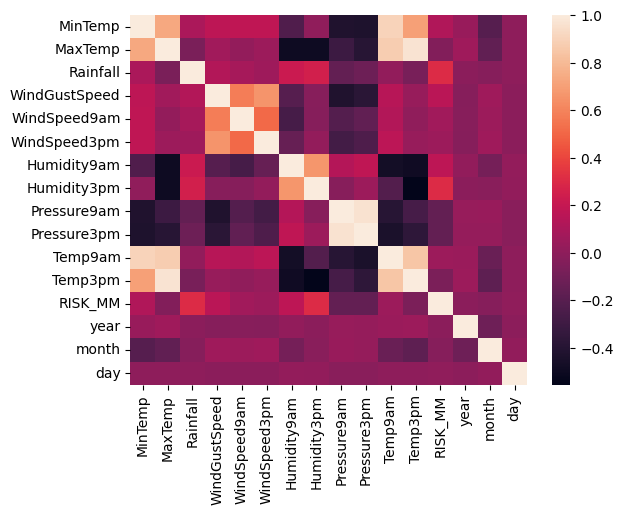

In [376]:
sns.heatmap(data=cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values)

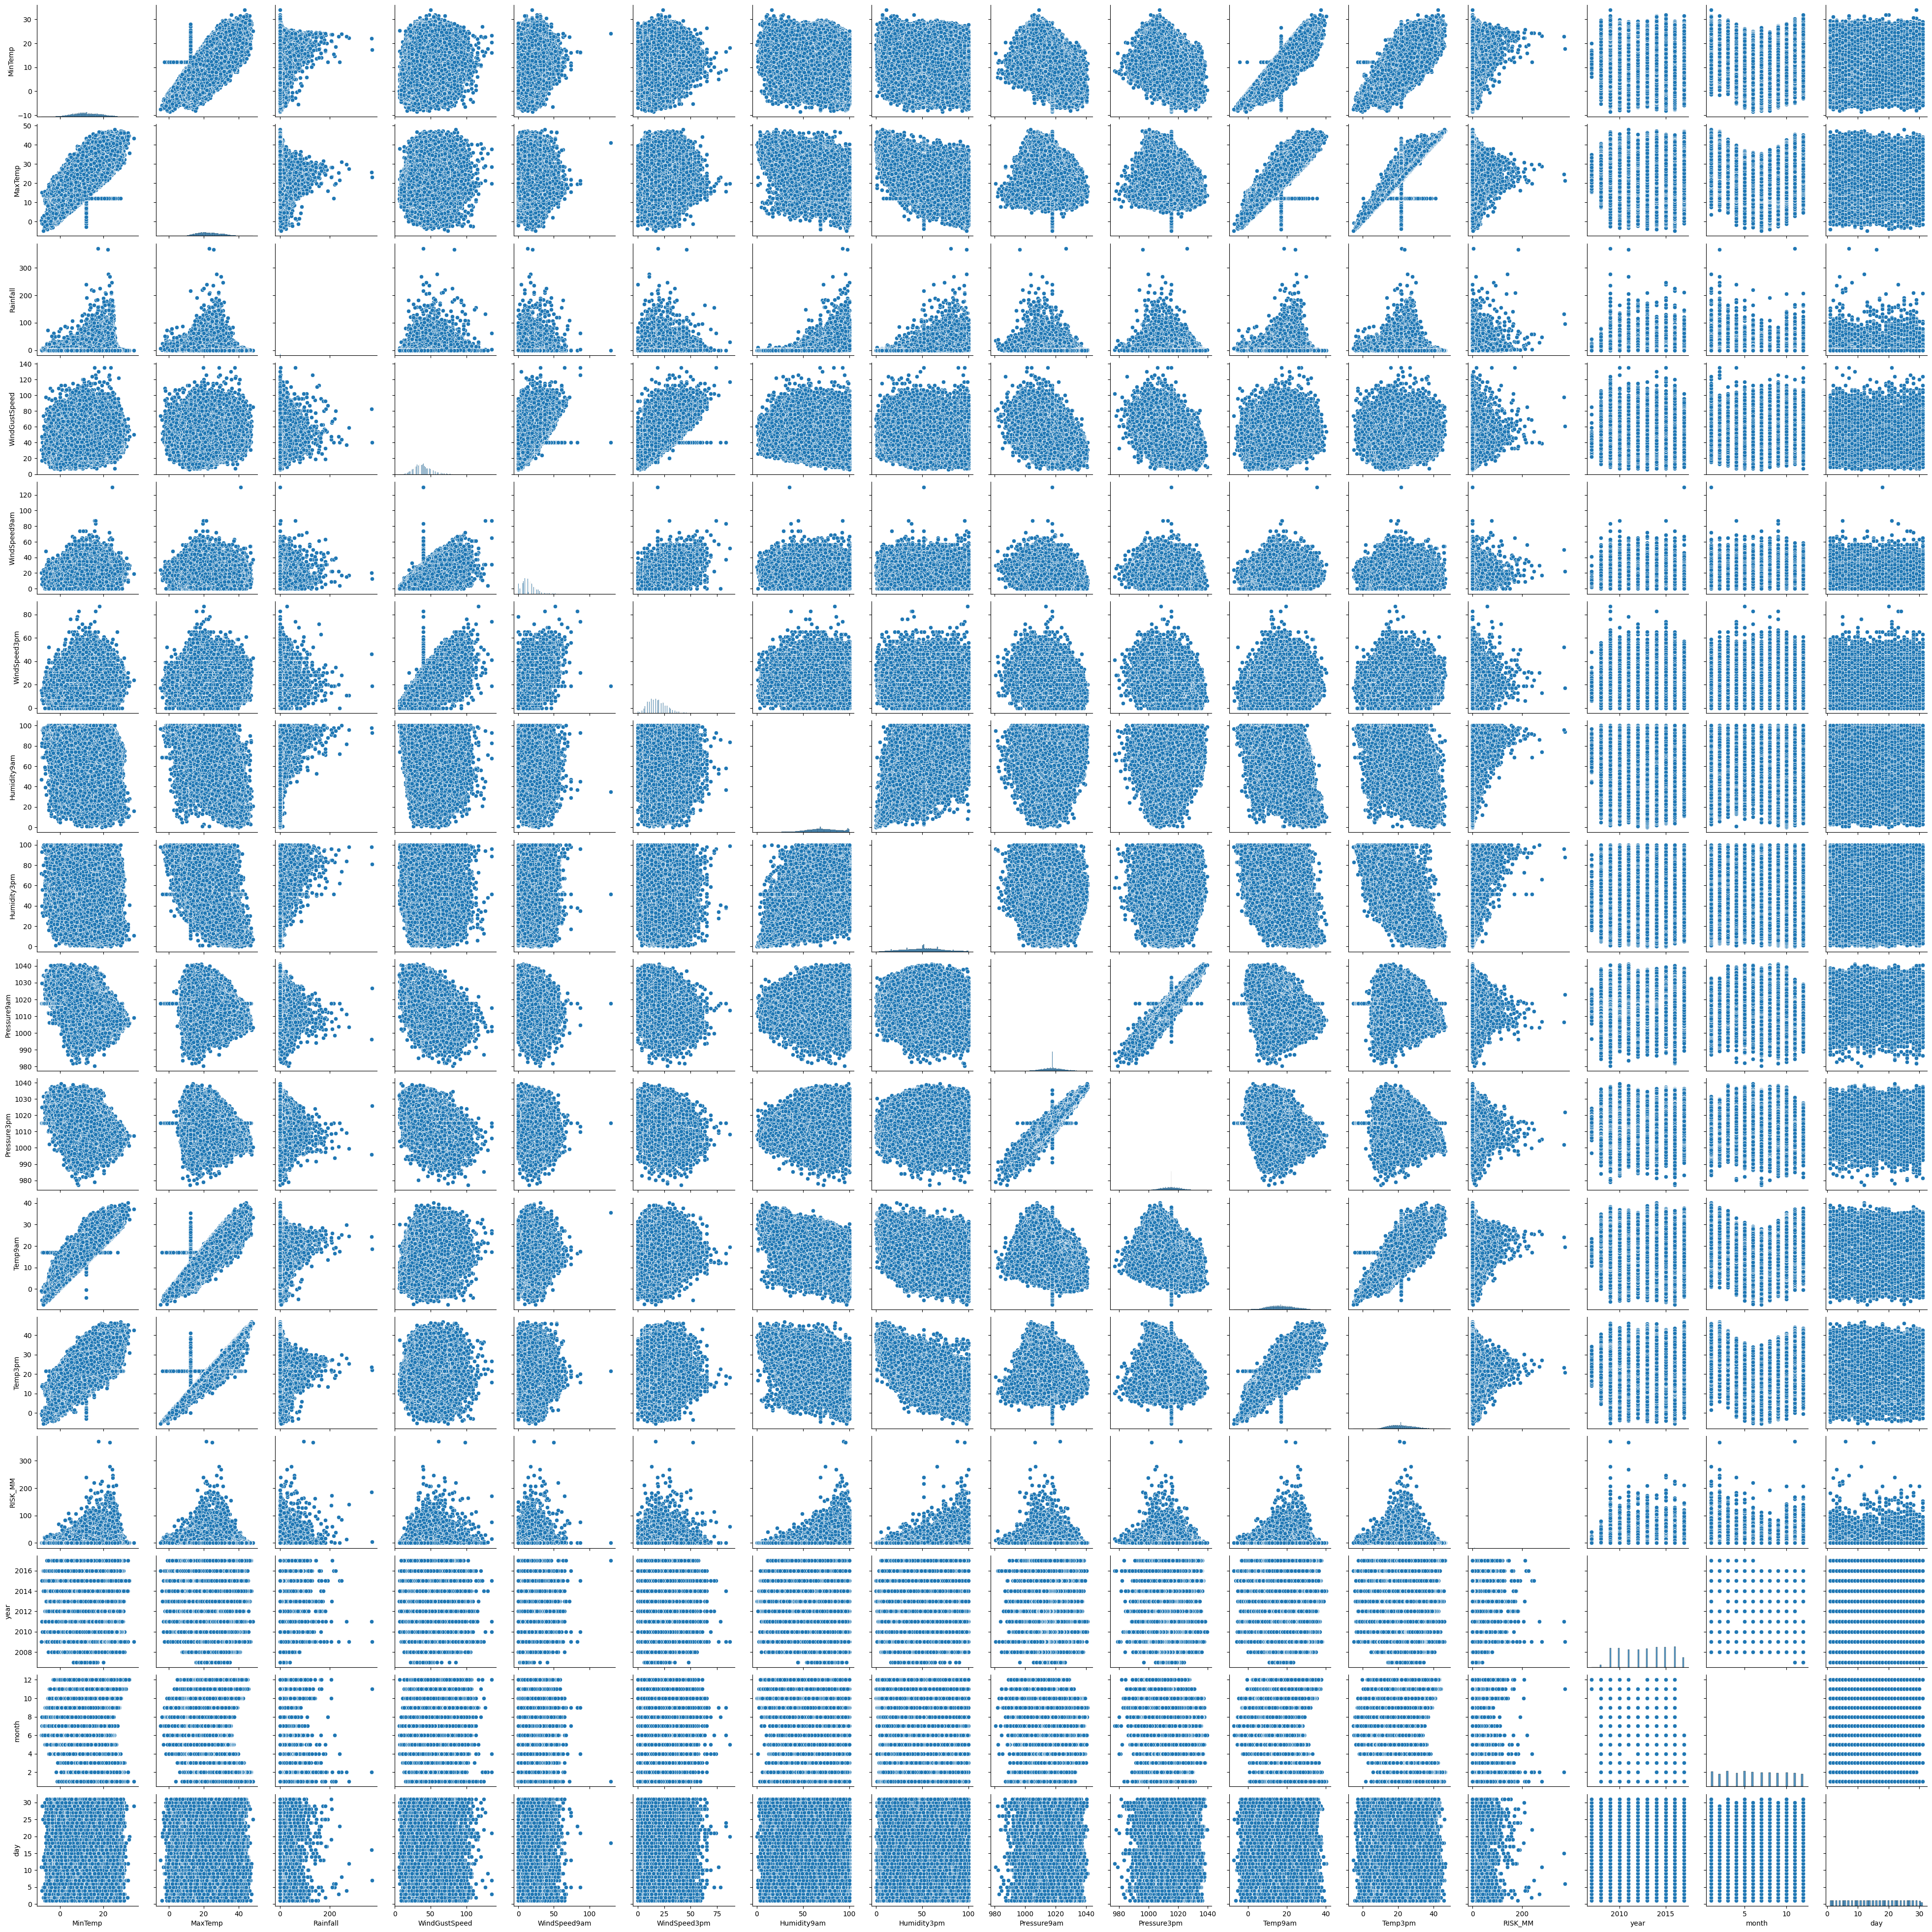

In [377]:
sns.pairplot(data)

<Axes: >

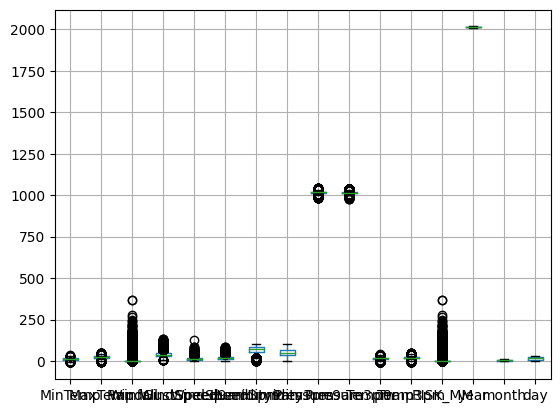

In [378]:
data.boxplot()

In [379]:
from sklearn.preprocessing import StandardScaler

In [380]:
#splitting x and y values
y = data['RainTomorrow']
x = data.drop('RainTomorrow',axis=1)

In [381]:
names = x.columns # loading the names of the x_features

In [382]:
names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'year',
       'month', 'day', 'RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [383]:
sc = StandardScaler()

In [384]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your dataframe and 'Location' is the only categorical feature
label_encoder = LabelEncoder()
data['Location'] = label_encoder.fit_transform(data['Location'])
data['RainToday'] = label_encoder.fit_transform(data['RainToday'])
data['WindGustDir'] = label_encoder.fit_transform(data['WindGustDir'])
data['WindDir9am'] = label_encoder.fit_transform(data['WindDir9am'])
data['WindDir3pm'] = label_encoder.fit_transform(data['WindDir3pm'])
data['RainTomorrow'] = label_encoder.fit_transform(data['RainTomorrow'])

y = data['RainTomorrow']
x = data.drop('RainTomorrow',axis=1)

In [385]:
x = sc.fit_transform(x)

In [386]:
x = pd.DataFrame(x,columns=names)

In [387]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state =0)

In [388]:
#Models intitization of the models
import sklearn
XGBoost = xgboost.XGBRFClassifier()
Rand_forest = sklearn.ensemble.RandomForestClassifier()
svm = sklearn.svm.SVC()
Dtree = sklearn.tree.DecisionTreeClassifier()
GBM = sklearn.ensemble.GradientBoostingClassifier()
log = sklearn.linear_model.LogisticRegression()

In [389]:
XGBoost.fit(x_train,y_train)
Rand_forest.fit(x_train,y_train)
svm.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
GBM.fit(x_train,y_train)
log.fit(x_train,y_train)

LogisticRegression()

In [390]:
# predicting the train values
p1 = Rand_forest.predict(x_train)
p2 = svm.predict(x_train)
p3 = Dtree.predict(x_train)
p4 = GBM.predict(x_train)
p5 =log.predict(x_train)
p6 =XGBoost.predict(x_train)

In [391]:
print("Rand_forest:" , metrics.accuracy_score(y_train,p1))
print("svm:" , metrics.accuracy_score(y_train,p2))
print("Dtree:" , metrics.accuracy_score(y_train,p3))
print("GBM:" , metrics.accuracy_score(y_train,p4))
print("log:" , metrics.accuracy_score(y_train,p5))
print("XGBoost:" , metrics.accuracy_score(y_train,p6))

Rand_forest: 1.0
svm: 0.9894860840058372
Dtree: 1.0
GBM: 1.0
log: 0.9996659458128945
XGBoost: 0.9999384637023753


In [392]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [393]:
model.fit(x_train,y_train)

LogisticRegression()

In [394]:
y_pred = model.predict(x_test)

In [395]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)

In [396]:
print(conf_matrix)

[[22067     0]
 [   11  6361]]


In [397]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 score: {r2}")

MAE: 0.000386792784556419
MSE: 0.000386792784556419
RMSE: 0.019667048191236502
R2 score: 0.9977752155301959


In [398]:
import pickle

In [400]:
pickle.dump(model,open('rainfall.pkl','wb'))
pickle.dump(label_encoder,open('encoder.pkl','wb'))
pickle.dump(imp_mode,open('impter.pkl','wb'))
pickle.dump(sc,open('scale.pkl','wb'))